## Customer Segmentation with K-Means
Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data. Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to retaining those customers. Another group might include customers from non-profit organizations.

In [17]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#Plot styling
import seaborn as sns; sns.set()  # for plot stylin


In [18]:
# Importing the dataset
c_data = pd.read_excel("Cust_Segmentation.xlsx")
c_data.head(2)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8


In [19]:
#descriptive statistics of the dataset
c_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Customer Id,850.0,425.500000,245.518160,1.000,213.25000,425.500,637.75000,850.000
Age,850.0,35.029412,8.041432,20.000,29.00000,34.000,41.00000,56.000
Edu,850.0,1.710588,0.927784,1.000,1.00000,1.000,2.00000,5.000
Years Employed,850.0,8.565882,6.777884,0.000,3.00000,7.000,13.00000,33.000
Income,850.0,46.675294,38.543054,13.000,24.00000,35.000,55.75000,446.000
Card Debt,850.0,1.576820,2.125843,0.012,0.38250,0.885,1.89850,20.561
Other Debt,850.0,3.078773,3.398799,0.046,1.04575,2.003,3.90325,35.197
Defaulted,700.0,0.261429,0.439727,0.000,0.00000,0.000,1.00000,1.000
DebtIncomeRatio,850.0,10.171647,6.719441,0.100,5.10000,8.700,13.80000,41.300


- The dataset consists of 850 rows. The mean annual income is 46$

Text(0.5, 0, 'Income / Years Employed')

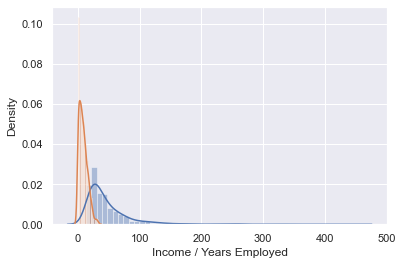

In [23]:
#Visualizing the data - displot
plot_income = sns.distplot(c_data["Income"])
plot_spend = sns.distplot(c_data["Years Employed"])
plt.xlabel('Income / Years Employed')

[(0.0, 420.0)]

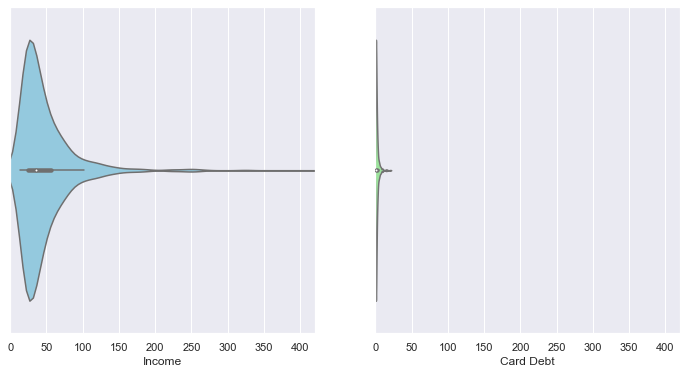

In [24]:
#Violin plot of Income and Card Debt
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)
v1 = sns.violinplot(data=c_data, x='Income', color="skyblue",ax=axes[0])
v2 = sns.violinplot(data=c_data, x='Card Debt',color="lightgreen", ax=axes[1])
v1.set(xlim=(0,420))

## Why Clustering?

- The mathematics behind clustering, in very simple terms involves minimizing the sum of square of distances between the cluster centroid and its associated data points
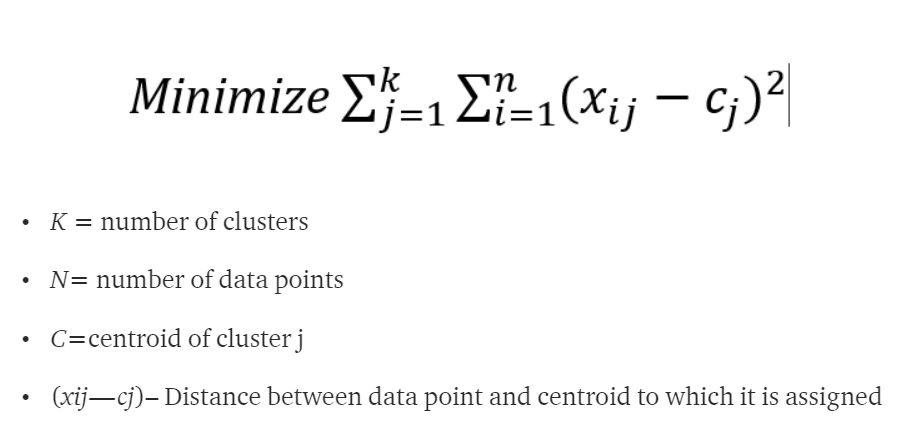



In [25]:
X= c_data.iloc[:, [0,1]].values

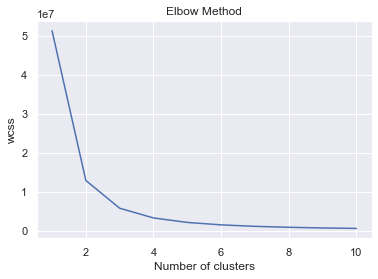

In [26]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [35]:
#Model Build
kmeansmodel = KMeans(n_clusters= 4, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)
# Centroid values
C = kmeansmodel.cluster_centers_
print(C)

[[524.          35.47906977]
 [311.5         34.72380952]
 [741.          34.91324201]
 [103.5         34.99514563]]


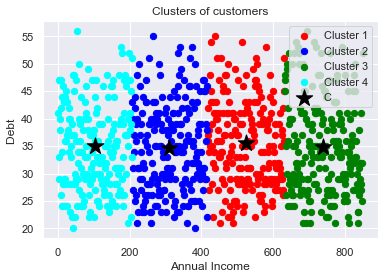

In [36]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 40, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 40, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 40, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 40, c = 'cyan', label = 'Cluster 4')
plt.scatter(C[:, 0],C[:, 1], s = 300, c = 'black', label = 'C',marker="*")
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Debt ')
plt.legend()
plt.show()

### Insights
The plot shows the distribution of the 4 clusters. We could interpret them as the following customer segments:

- Cluster 1: Customers with medium annual income and medium Debt
- Cluster 2: Customers with high annual income and medium to high annual Debt
- Cluster 3: Customers with low annual income
- Cluster 4: Customers with medium annual income but high annual Debt

In [39]:
#Model Build
kmeansmodel = KMeans(n_clusters= 5, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)
# Centroid values
C = kmeansmodel.cluster_centers_
print(C)

[[421.          35.74556213]
 [252.5         35.1547619 ]
 [763.5         34.40804598]
 [ 84.5         34.33928571]
 [591.          35.50877193]]


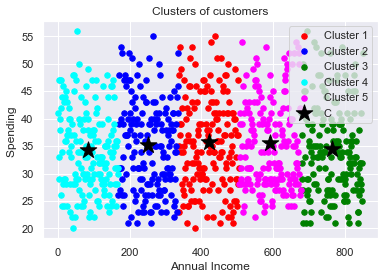

In [40]:
#Visualizing all the clusters 

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 30, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 30, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 30, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 30, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 30, c = 'magenta', label = 'Cluster 5')
plt.scatter(C[:, 0],C[:, 1], s = 300, c = 'black', label = 'C',marker="*")
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending ')
plt.legend()
plt.show()

### Insights :
- Cluster 1: Medium income, low annual debt
- Cluster 2: Low income, low annual debt
- Cluster 3: High income, high annual debt
- Cluster 4: Low income, high annual debt
- Cluster 5: Medium income, low annual debt
